In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

#Read the dataset and split it into input and output.
dataset = pd.read_csv('diabetes.csv')
print(dataset.head())
X = dataset.iloc[:,[0,1,2,3,4,5,6,7]].values
Y = dataset.iloc[:,[8]].values
#print(X)
#print(Y)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [2]:
#Split both input and output collections into training sets and validation sets.
from sklearn.model_selection import train_test_split
np.random.seed(0)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)
print(X_train)

[[1.50e+02 7.80e+01 1.26e+02 3.52e+01 6.92e-01 5.40e+01]
 [9.70e+01 6.00e+01 0.00e+00 2.82e+01 4.43e-01 2.20e+01]
 [1.65e+02 9.00e+01 6.80e+02 5.23e+01 4.27e-01 2.30e+01]
 ...
 [9.40e+01 6.50e+01 0.00e+00 2.47e+01 1.48e-01 2.10e+01]
 [8.50e+01 7.40e+01 0.00e+00 3.01e+01 3.00e-01 3.50e+01]
 [1.36e+02 8.20e+01 0.00e+00 0.00e+00 6.40e-01 6.90e+01]]


In [3]:
#Perform standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train)


[[ 0.91569367  0.44912368  0.3736349   0.37852648  0.67740401  1.69955804]
 [-0.75182191 -0.47230103 -0.69965674 -0.50667229 -0.07049698 -0.96569189]
 [ 1.38763205  1.06340683  5.09271083  2.54094063 -0.11855487 -0.88240283]
 ...
 [-0.84620959 -0.21634972 -0.69965674 -0.94927168 -0.95656442 -1.04898095]
 [-1.12937261  0.24436264 -0.69965674 -0.26640405 -0.50001442  0.11706589]
 [ 0.47521786  0.65388473 -0.69965674 -4.07275877  0.52121586  2.94889395]]


In [4]:
#Question 1
#Logistic regression
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
#print(Y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [5]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(Y_test, Y_pred)
print(cm)

[[96 11]
 [18 29]]


In [6]:
#Compute validation scores for the logisitic regression
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred)) 

Accuracy: 0.8116883116883117
Precision: 0.725
Recall: 0.6170212765957447


Text(0.5, 257.44, 'Predicted label')

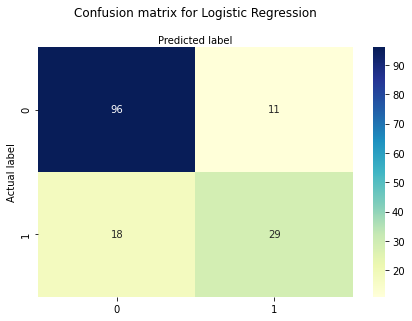

In [7]:
#Output a visual representation of the confusion matirx.
import seaborn as sns 
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix for Logistic Regression', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 

In [8]:
#Question 2
#Naives Bayes classifier
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
Y_pred  =  classifier.predict(X_test)
#print(Y_pred)  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [9]:
#Compute confuison matrix and validation scores for the Naive Bayes classifier
cmB = confusion_matrix(Y_test, Y_pred)
print(cmB)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred)) 

[[93 14]
 [19 28]]
Accuracy: 0.7857142857142857
Precision: 0.6666666666666666
Recall: 0.5957446808510638


Text(0.5, 257.44, 'Predicted label')

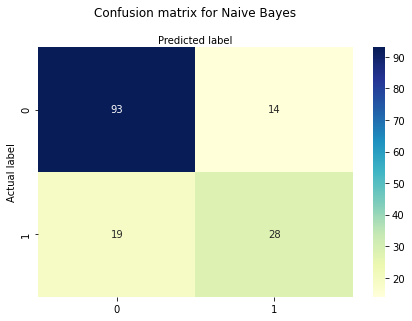

In [10]:
#Output a visual representation of the confusion matirx.
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cmB), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix for Naive Bayes', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 

In [11]:
#Question 3
#Logistic Regression with cross-validation
from numpy import mean
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score

#Five folds
cv = KFold(n_splits=5, random_state=1, shuffle=True)
model = LogisticRegression(random_state=0)
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score)}

scores = cross_validate(model, X, Y, scoring=scoring, cv=cv, n_jobs=-1)
#print(scores)
print("Accuracy:",mean(scores['test_accuracy'])) 
print("Precision:",mean(scores['test_precision'])) 
print("Recall:",mean(scores['test_recall'])) 


Accuracy: 0.768203038791274
Precision: 0.7106967290603139
Recall: 0.5680079954985615


In [12]:
#Ten folds
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = LogisticRegression(random_state=0)
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score)}

scores = cross_validate(model, X, Y, scoring=scoring, cv=cv, n_jobs=-1)
#print(scores)
print("Accuracy:",mean(scores['test_accuracy'])) 
print("Precision:",mean(scores['test_precision'])) 
print("Recall:",mean(scores['test_recall']))


Accuracy: 0.7720608339029391
Precision: 0.7151630601790784
Recall: 0.5727476539508023


In [13]:
#Question 4
#Naive Bayes with cross-validation, even though it does not make conceptual sense to do this...
#Five folds:
cv = KFold(n_splits=5, random_state=1, shuffle=True)
model = GaussianNB()
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score)}

scores = cross_validate(model, X, Y, scoring=scoring, cv=cv, n_jobs=-1)
#print(scores)
print("Accuracy:",mean(scores['test_accuracy'])) 
print("Precision:",mean(scores['test_precision'])) 
print("Recall:",mean(scores['test_recall'])) 


Accuracy: 0.7617349970291146
Precision: 0.6960411320890618
Recall: 0.5685525606469003


In [14]:
#Ten folds:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = GaussianNB()
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score)}

scores = cross_validate(model, X, Y, scoring=scoring, cv=cv, n_jobs=-1)
#print(scores)
print("Accuracy:",mean(scores['test_accuracy'])) 
print("Precision:",mean(scores['test_precision'])) 
print("Recall:",mean(scores['test_recall'])) 


Accuracy: 0.7616199589883801
Precision: 0.6970588145645353
Recall: 0.5613200557840738
